In [1]:
!pip install seaborn matplotlib scipy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 10.1 MB/s eta 0:00:0000:0100:01


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Chargement des données
tips = sns.load_dataset("tips")

In [4]:
# Aperçu et types

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [9]:
# Statistiques descriptives

tips [["total_bill", "tip", "size"]].describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
# Valeurs manquantes

tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

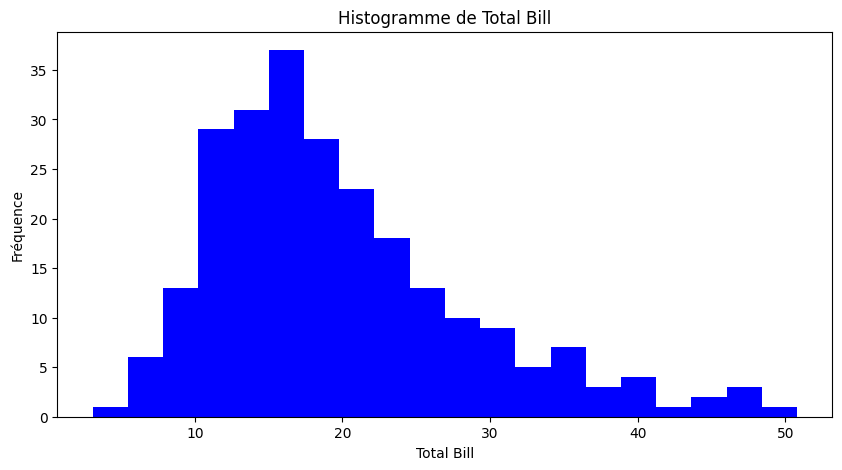

In [21]:
# Histogrammes

plt.figure(figsize=(10, 5))
plt.hist(tips['total_bill'], bins=20, color='blue')
plt.title('Histogramme de Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Fréquence')

plt.show()

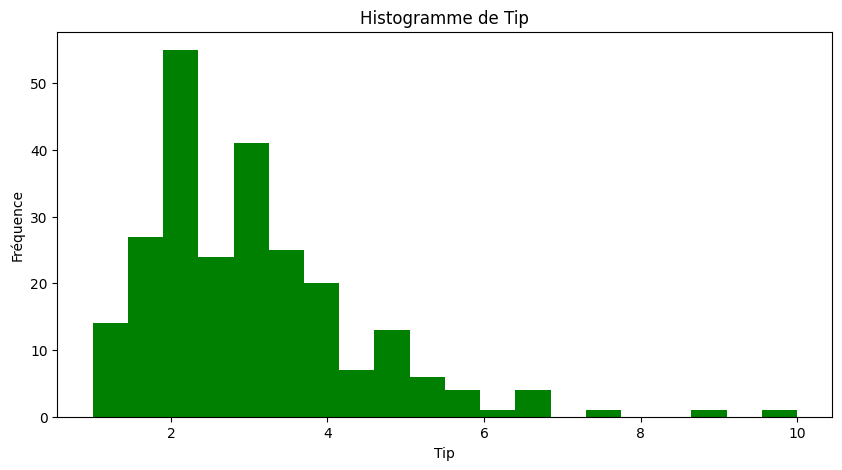

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(tips['tip'], bins=20, color='green')
plt.title('Histogramme de Tip')
plt.xlabel('Tip')
plt.ylabel('Fréquence')

plt.show()

In [24]:
# Moyenne groupées
tips.groupby("sex", observed=False)["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [25]:
tips.groupby("smoker", observed=False)["tip"].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [26]:
tips.groupby("day", observed=False)["tip"].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [27]:
# Pourboire moyen par nombre de personnes 

tips.groupby("size", observed=False)["tip"].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [66]:
# Table croisée

pivot = pd.pivot_table(tips, index="day", columns="time", values="tip", aggfunc="mean", observed=False)
pivot

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


In [100]:
# Propotion des fumeurs


fumeurs_pct = (tips["smoker"] == "Yes").mean() * 100
print(f"Pourcentage de fumeurs : {fumeurs_pct:.2f}%")

Pourcentage de fumeurs : 38.11%


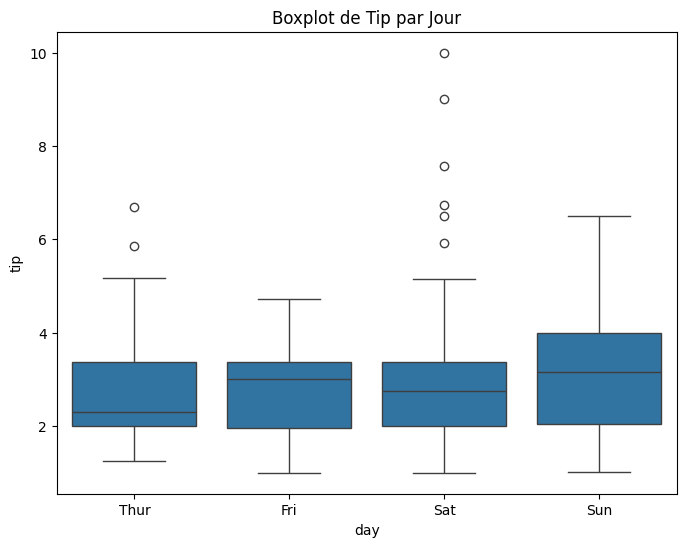

In [31]:
# Boite à moustaches

plt.figure(figsize=(8, 6))
sns.boxplot(tips, x='day', y='tip')
plt.title('Boxplot de Tip par Jour')

plt.show()

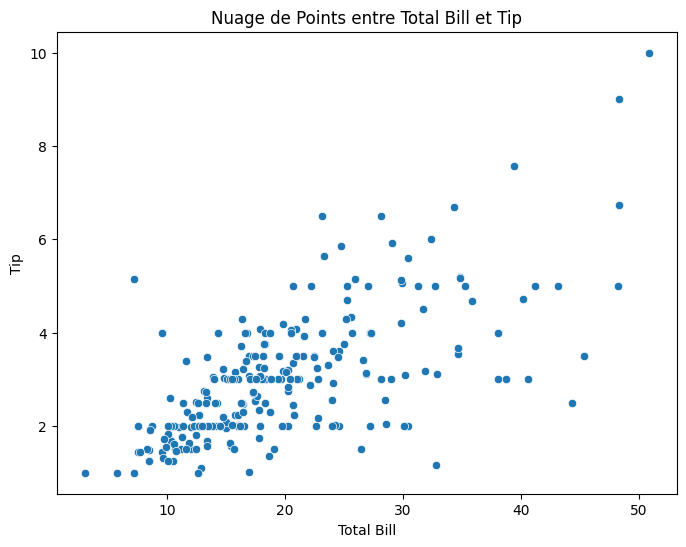

In [38]:
# Scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(tips, x='total_bill', y='tip')
plt.title('Nuage de Points entre Total Bill et Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

In [ ]:
# Corrélations linéaires


In [47]:
# Corrélations catégorielles


In [48]:
# Difference


In [54]:
# Pourboire proportionnel à l'addition

tips["tip_pct"] = tips["tip"] / tips["total_bill"]

tips.head()



,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [109]:
tips['tip_pct'].mean()

np.float64(0.16080258172250472)

In [57]:
tips['tip_pct'].std()

np.float64(0.06107220419157192)

In [59]:
# Qui donne les plus gros pourboires en proportion 

tips.groupby('sex', observed=False)['tip_pct'].mean()

sex
Male      0.157651
Female    0.166491
Name: tip_pct, dtype: float64

In [60]:
tips.groupby('smoker', observed=False)['tip_pct'].mean()

smoker
Yes    0.163196
No     0.159328
Name: tip_pct, dtype: float64

In [61]:
tips.groupby('day', observed=False)['tip_pct'].mean()

day
Thur    0.161276
Fri     0.169913
Sat     0.153152
Sun     0.166897
Name: tip_pct, dtype: float64

In [62]:
# Conversion en NumPy

tips[["total_bill", "tip"]].to_numpy().shape

(244, 2)

In [64]:
#  Calculs vectorisés

np.mean(tips["tip"])

np.float64(2.99827868852459)

In [65]:
np.max(tips["tip"])

np.float64(10.0)

In [67]:
np.sum(tips[tips["total_bill"] > 30]["tip"])

np.float64(146.66)

In [71]:
#  Filtrage conditionnel avec NumPy

tips_above = tips['tip'][tips['size'] >= 4]

np.mean(tips_above)

np.float64(4.218478260869565)

In [78]:
# Indexation booléenne avec Pandas

tips[tips["tip_pct"] > 0.2].shape[0]


39

In [79]:
# Application de fonctions personnalisées

def tip_level(tip):
    if tip < 2:
        return "faible"
    elif tip < 5:
        return "moyen"
    else:
        return "élevé"

In [81]:
tip_level = tips['tip'].apply(tip_level)
print(tip_level.value_counts())

tip
moyen     171
faible     45
élevé      28
Name: count, dtype: int64


In [103]:
# Création de colonnes avec np.where

tips["is_large_party"] = np.where(tips["size"] >= 4, True, False)

print(tips[["size", "is_large_party"]].head())

   size  is_large_party
0     2           False
1     3           False
2     3           False
3     2           False
4     4            True


In [85]:
# Tri avec NumPy

np.sort(tips["total_bill"])[-10:]

array([40.17, 40.55, 41.19, 43.11, 44.3 , 45.35, 48.17, 48.27, 48.33,
       50.81])

In [87]:
# Groupes et écart-type

tips.groupby('day', observed=False)['tip_pct'].std()

day
Thur    0.038652
Fri     0.047665
Sat     0.051293
Sun     0.084739
Name: tip_pct, dtype: float64

In [89]:
# Masquage NumPy avancé

mask = (tips["tip"] > 5) & (tips["time"] == "Dinner") & (tips["smoker"] == "Yes")
tips[mask].shape[0]


6

In [93]:
# Jointure avec concaténation

male_df = tips[tips["sex"]== "Male"]
female_df = tips[tips["sex"] == "Female"]
concat_df = pd.concat([male_df, female_df])

print(concat_df)

     total_bill   tip     sex smoker   day    time  size   tip_pct
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
..          ...   ...     ...    ...   ...     ...   ...       ...
226       10.09  2.00  Female    Yes   Fri   Lunch     2  0.198216
229       22.12  2.88  Female    Yes   Sat  Dinner     2  0.130199
238       35.83  4.67  Female     No   Sat  Dinner     3  0.130338
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 8 columns]
